In [2]:
import pandas as pd
import numpy as np
import re
from analysis import actions
from matplotlib import style, pyplot as plt
from dateutil.parser import parse

In [3]:
df = pd.read_csv('../data/all-history-actions.csv')

In [3]:
dfg = df.tail(800).groupby('id')


actions_first_committee = []


for i, p in dfg: 
  for e, a in p.iterrows():
    if a.action.find(r"second") > -1:
      actions_first_committee.append(a)
      break
    actions_first_committee.append(a)
    

df_only = pd.DataFrame(actions_first_committee)

df_only



,id,action,branch,date
44672,S853,Referred to the committee on Higher Education,Senate,2021-03-29T15:26:19.180Z
44673,S853,House concurred,House,2021-03-29T15:26:19.180Z
44674,S853,Hearing scheduled for 06/08/2021 from 10:00 AM...,Joint,2021-06-01T16:34:05.580Z
44675,S853,"Accompanied a study order, see S2714",Senate,2022-02-24T16:11:00.650Z
44676,S854,Referred to the committee on Higher Education,Senate,2021-03-29T15:26:19.180Z
...,...,...,...,...
45467,s2729,Recommended new text for H4126,Senate,2022-02-28T05:00:00.000Z
45468,s2729,Rules suspended,Senate,2022-02-28T05:00:00.000Z
45469,s2729,Substituted as a new text for H4126,Senate,2022-02-28T05:00:00.000Z
45470,s2729,See H4126,Senate,2022-02-28T05:00:00.000Z


In [4]:
def regexer(string_to_regex):
  return re.compile(string_to_regex, re.IGNORECASE)


referred = regexer("(referred)")
ways_means = regexer("(ways and means)")
engrossed = regexer("(engrossed)")
enacted = regexer("(enacted)")
signed = regexer("(signed)")

type_rs = [referred,ways_means,engrossed,enacted,signed]

def getActionType(x):
  types = []
  for r in type_rs: 
    action_type = r.search(x)
    if action_type != None: 
      type_captures = action_type.group()
      types.append(type_captures.lower())
  # return tuple(types)
  if len(types) > 0: 
    return types[-1]
  return ()
  

df['type'] = df['action'].apply(getActionType)

df

,id,action,branch,date,type
0,H1,Referred to the committee on House Ways and Means,House,2021-02-25T16:46:19.933Z,ways and means
1,H1,"Reported, in part, by H4000",House,2021-04-15T04:00:00.000Z,()
2,H10,Referred to the committee on Public Service,House,2021-04-13T15:59:37.223Z,referred
3,H10,Senate concurred,Senate,2021-04-13T15:59:37.223Z,()
4,H10,Hearing scheduled for 07/28/2021 from 01:00 PM...,Joint,2021-07-22T14:53:10.290Z,()
...,...,...,...,...,...
45467,s2729,Recommended new text for H4126,Senate,2022-02-28T05:00:00.000Z,()
45468,s2729,Rules suspended,Senate,2022-02-28T05:00:00.000Z,()
45469,s2729,Substituted as a new text for H4126,Senate,2022-02-28T05:00:00.000Z,()
45470,s2729,See H4126,Senate,2022-02-28T05:00:00.000Z,()


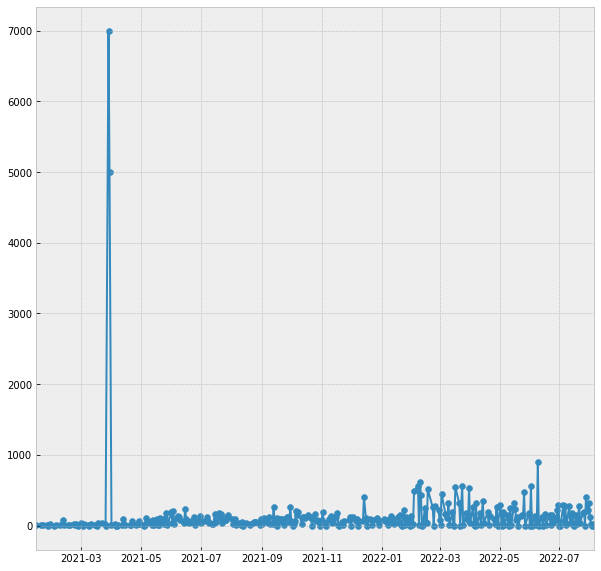

In [128]:



style.use('bmh')
df['short_date'] = df.date.apply(lambda x: parse(x).date())
dfs = df.groupby('short_date', group_keys=True)

dft = dfs.count()

# print(dft, dft.index)

# y=dft
# x=dft.date.apply(lambda x: parse(x).date()).tolist()
# x=dft.group_keys()

plt.figure(figsize=[10,10])


plt.axis(xmin=dft.index.min(), xmax=dft.index.max())

plt.scatter(dft.index, dft.action)
plt.plot(dft.index, dft.action)

In [85]:
engrossed = df[df['action'].apply(lambda x: re.compile("engrossed", re.IGNORECASE).search(x) != None)]
readthird = df[df['action'].apply(lambda x: re.compile("read third", re.IGNORECASE).search(x) != None)]
enacted = df[df['action'].apply(lambda x: re.compile("enacted", re.IGNORECASE).search(x) != None)]

# display(engrossed.describe())
# display(readthird.describe())
# display(enacted.describe())


readthird[readthird['branch'] == 'House'][['id', 'date', 'action']]
engrossed[engrossed['branch'] == 'House'][['id', 'date', 'action']]



,id,date,action
12,H100,2021-04-28T04:00:00.000Z,Read third and passed to be engrossed
3272,H1661,2022-06-15T04:00:00.000Z,Read third and passed to be engrossed
4531,H1917,2022-03-14T04:00:00.000Z,Read third and passed to be engrossed
5842,H2144,2021-10-12T04:00:00.000Z,Read third and passed to be engrossed
5873,H2147,2021-10-18T04:00:00.000Z,Read third and passed to be engrossed
...,...,...,...
42197,S41,2021-05-13T04:00:00.000Z,"Read second, ordered to a third reading, rules..."
42610,S493,2021-07-26T04:00:00.000Z,"Read third, amended and passed to be engrossed"
42878,S535,2022-07-05T04:00:00.000Z,Read third and passed to be engrossed
43245,S6,2021-01-25T05:00:00.000Z,Read third and passed to be engrossed
